# Engenharia do Conhecimento 2022/2023

## Lab class TP03

# Model Evaluation and Selection

*Another Supervised Learning Tutorial by Andre Falcao + Cátia Pesquita + Sofia Teixeira + Nuno Garcia (DI/FCUL 2021-2023)*

### Summary

1. Evaluating Regression Models
2. Evaluating Classification Models
3. Fitting and validating models
4. Model Selection




## 1. Evaluating Regression Models

A regression model (fittting a continuous dependent variable) usually requires a minimization of the prediction errors. These can be assessed generally with two different statistics:

1. A measure that quantifies the error in units of the dependent variable
2. A measure that identifies how much of the total variance is being explained by the model

These quantities, although related, are not the same, and convey different pieces of information.

Generally the measure of the error is the Root Mean Squared Error (rmse) which quantifies in average how much a model is failing its prediction:

$rmse= \sqrt{\frac{\sum{(y_i-\hat{y})^2}}{N}}$

The variance explained is defined as the Ratio of the Variance Explained (RVE):

$RVE =1-\frac{\sum{(y_i-\hat{y})^2}}{Var(y)}$

This gives a relative value of the quality of the model. A value close to 1.0 is a good model, while a value close to 0 is a model that is not giving good predictions. For linear regression, the RVE is equivalent to the familiar $R^2$.

Another way of evaluating the result of a model, which may actually be uncorrelated with the other mentioned methods, is the use of the Pearson Correlation Coefficient for the prediction values against the truth values:

$\rho_{y,\hat{y}}=\frac{cov(y,\hat{y})}{\sigma_y \sigma_{\hat{y}}}$


Scikit-learn has all these metrics implemented and it is adviseable to use the [Detailed help files](https://scikit-learn.org/stable/modules/model_evaluation.html).

## 1.2. Evaluating Linear Regression Models

First let's fit a model, as on previous class
1. Get the data
2. split the data into train and test
3. fit the model with the training set
4. evaluate the model with the test set

We are going to use the Diabetes data set as before and, for starters, we will use simple cross validation with a training and a test set.

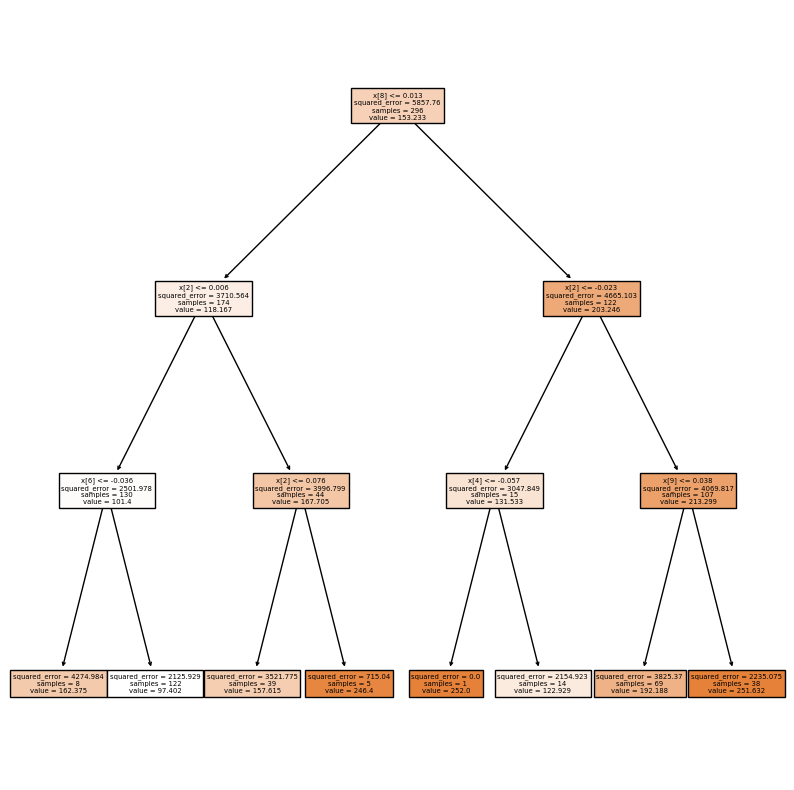

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X_diabetes, y_diabetes=load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.33, random_state=22)
mdl = DecisionTreeRegressor(max_depth=3) #<------change this parameter
mdl.fit(X_train, y_train)

plt.figure(figsize=(10,10))
r=plot_tree(mdl, filled=True)
plt.show()

Now let's compute the basic statistics:
* RVE - Ratio of Variance Explained
* RMSE - Root Mean Squared Error
* Pearson Correlation score
* Mean absolute error
* Maximum error

In [5]:
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr

preds=mdl.predict(X_test)

print("The RVE is: ", explained_variance_score(y_test, preds))
print("The rmse is: ", mean_squared_error(y_test, preds, squared=False))
corr, pval=pearsonr(y_test, preds)
print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))

print("The Maximum Error is is: ", max_error(y_test, preds))
print("The Mean Absolute Error is: ", mean_absolute_error(y_test, preds))


The RVE is:  0.39692740527256953
The rmse is:  60.5090643992905
The Correlation Score is is: 0.6327 (p-value=1.063726e-17)

The Maximum Error is is:  167.6315789473684
The Mean Absolute Error is:  48.598043938700805


It is many times valuable to have a graphical interpretation of the predicted vs Truth Graph results, as we can understand the types of errors found


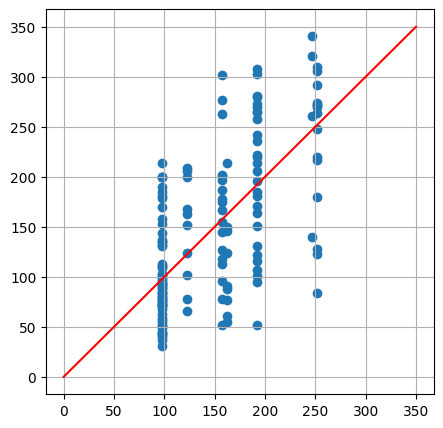

In [6]:
preds=mdl.predict(X_test)
plt.figure(figsize=(5,5))
plt.scatter(preds, y_test)
plt.plot((0, 350), (0,350), c="r")
plt.grid()
plt.show()

#### Exercises

1. Comment and discuss the results above
2. Is it possible that the RVE becomes negative? Discuss.
3. Examine the Predicted-Truth graph above and comment the results

## 2. Evaluating Classification Models

### 2.1 Binary classifiers



Data sets with a very small number of positives makes the Accuracy value illusory. The number of correct and important ratings is much lower, because the number of positives is much smaller than the number of negatives. This situation where the number of positives is much smaller than the number of negatives is the most frequent in real machine learning problems.

To solve these problems a series of metrics were created that use the [following information](https://en.wikipedia.org/wiki/Confusion_matrix) taken from the confusion matrix:

* `TP` - True positives - correctly classified positive values
* `TN` - True negatives - correctly classified negative values
* `FP` - False positives - incorrectly sorted positive values
* `FN` - False negatives - incorrectly sorted negative values

The most common metrics are:

$Precision =\frac{TP}{TP+FP}$

indicates the fraction of true positives within all identified positives

$Recall =\frac{TP}{TP+FN}$

Indicates the fraction of true positives out of all existing positives (also called Sensitivity)

$Specificity=\frac{TN}{TN+FP}$

Represents the ratio of correctly identified negatives among all negatives (not so relevant for problems where the number of positives is much smaller than the number of negatives)


$F1=2\frac{Precision\times Recall}{Precision+Recall}$

It's the harmonic mean between Precision and Recall. It is a good metric that gives an added value of the quality of a model.

One of the most reliable statistics it is the **Matthews Correlation Coefficient** (or Phi-Coefficient) that is able to produce a reliable result even if the data is heavily unbalanced

$MCC= \frac{TP.TN-FP.FN}{\sqrt{(TP+FP).(TP+FN).(TN+FP).(TN+FN)}}$  

Despite being very easy to calculate, scikit-learn already has all these metrics defined [and many more](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). 


### 2.2 Binary classifiers in practice

We are going to use the [breast cancer toy dataset of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

In [7]:
from sklearn.datasets import load_breast_cancer
X_bc, y_bc=load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=22)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=22)

mdl = DecisionTreeClassifier(min_samples_leaf=5)
mdl.fit(X_train, y_train)
preds = mdl.predict(X_test)


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
import pandas as pd

print("The Precision is: %7.4f" % precision_score(y_test, preds))
print("The Recall is: %7.4f" % recall_score(y_test, preds))
print("The F1 score is: %7.4f" % f1_score(y_test, preds))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))
print()
print("This is the Confusion Matrix")
pd.DataFrame(confusion_matrix(y_test, preds))

The Precision is:  0.9583
The Recall is:  0.9718
The F1 score is:  0.9650
The Matthews correlation coefficient is:  0.9064

This is the Confusion Matrix


,0,1
0,40,3
1,2,69


#### The Classification Report

scikit-learn has a classification report facility that produces the F1, Precision and Recall statistics even for multiclass classification problems. It will produce these 3 statistics for each class (so each handled as a binary classification problem) and a global score that is weighted according to the classes priors



In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### 2.2. N-ary classifiers


For this type of classifieers we will use the 
* Generall acuracy
* Matthews Correlation  Coefficient
* Confusion matrix
* General Classification Report

In [11]:
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
X_w, y_w=load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_w, y_w, test_size=0.2, random_state=22)

mdl = DecisionTreeClassifier(min_samples_leaf=5)
mdl.fit(X_train, y_train)
preds=mdl.predict(X_test)
print("The accuracy score is: %7.4f" % accuracy_score(y_test, preds))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))
print()
print("This is the Confusion Matrix")
pd.DataFrame(confusion_matrix(y_test, preds))

The accuracy score is:  0.8889
The Matthews correlation coefficient is:  0.8350

This is the Confusion Matrix


,0,1,2
0,9,0,0
1,2,13,1
2,0,1,10


The classification report presented above can naturally be used for many more classes (in this case, just 3)

In [12]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.93      0.81      0.87        16
           2       0.91      0.91      0.91        11

    accuracy                           0.89        36
   macro avg       0.89      0.91      0.89        36
weighted avg       0.90      0.89      0.89        36



#### Exercises

* Discuss which of these statistics (if any) do you believe is more relevant for large scale model evaluation
* In which situations would you use the Confusion Matrix?

## 3. Fitting and validating models

In this class we will focus on **retrospective validation**. The Procedure we will follow is the standard one and will test all known procedures


### 3.1.  Dataset preparation

As the classification datasets above are very easy, we will prepare the Diabetes for classification, considering positives all cases for which $Y \geq 250$

In [67]:
import numpy as np
yc_diabetes=np.array([int(i>=250) for i in y_diabetes])
vals, counts= np.unique(yc_diabetes, return_counts=True)
for v, c in zip(vals, counts):
    print(v, "--->", c)

0 ---> 377
1 ---> 65



### 3.2 Simple validation procedures

#### 3.2.1 Simple cross validation

Let's run the sample classifiction model with the basic binary classification statistics using simple cross validation

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, yc_diabetes, test_size=0.2)
mdl = DecisionTreeClassifier(min_samples_leaf=5)
mdl.fit(X_train, y_train)
preds = mdl.predict(X_test)

print("The Precision is: %7.4f" % precision_score(y_test, preds))
print("The Recall is: %7.4f" % recall_score(y_test, preds))
print("The F1 score is: %7.4f" % f1_score(y_test, preds))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))

The Precision is:  0.2500
The Recall is:  0.1818
The F1 score is:  0.2105
The Matthews correlation coefficient is:  0.1207


The results are definitely not brilliant. 

For some experimenting leeway let's use the Decision Tree Classifier, but we need to make all variables categorical. We shall use the same code as before for going through all the columns and attribute values.

In [69]:
#first discretize the X matrix into terciles
data=load_diabetes()
cnames=data.feature_names
Xc_diabetes=np.empty(X_diabetes.shape,dtype="object")
Xc_diabetes[:,:]="Medium"
for i,cname in enumerate(cnames):
    q33, q67=np.quantile(X_diabetes[:,i], (0.33, 0.67))
    Xc_diabetes[X_diabetes[:,i]<q33, i]="Small"
    Xc_diabetes[X_diabetes[:,i]>q67, i]="Large"

df_diabetes=pd.DataFrame(Xc_diabetes)
df_diabetes.columns=cnames
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,Large,Medium,Large,Medium,Small,Small,Small,Medium,Medium,Medium
1,Medium,Medium,Small,Medium,Medium,Medium,Large,Medium,Small,Small
2,Large,Medium,Large,Medium,Small,Small,Small,Medium,Medium,Small
3,Small,Medium,Medium,Small,Medium,Large,Small,Large,Large,Medium
4,Medium,Medium,Small,Medium,Medium,Medium,Medium,Medium,Small,Small
...,...,...,...,...,...,...,...,...,...,...
437,Large,Medium,Large,Large,Medium,Medium,Small,Medium,Large,Medium
438,Medium,Medium,Medium,Small,Large,Large,Small,Large,Medium,Large
439,Large,Medium,Medium,Medium,Small,Medium,Medium,Medium,Small,Medium
440,Small,Medium,Large,Medium,Medium,Medium,Small,Large,Large,Small


Now transform those qualitative values into separate columns. 

In [70]:
Xc_diabetes = pd.get_dummies(df_diabetes, drop_first=False).values
Xc_diabetes

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 1, 0]], dtype=uint8)

Finally train and evaluate a Decision Tree with this transformed dataset

In [71]:
X_train, X_test, y_train, y_test = train_test_split(Xc_diabetes, yc_diabetes, test_size=0.2)
mdl = DecisionTreeClassifier(min_samples_leaf=5)
mdl.fit(X_train, y_train)
preds = mdl.predict(X_test)

print("The Precision is: %7.4f" % precision_score(y_test, preds))
print("The Recall is: %7.4f" % recall_score(y_test, preds))
print("The F1 score is: %7.4f" % f1_score(y_test, preds))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))

The Precision is:  0.4375
The Recall is:  0.3889
The F1 score is:  0.4118
The Matthews correlation coefficient is:  0.2742


#### Exercise 

The `min_samples_leaf` hyperparameter might have a direct impact on the classification results. One solution to choose the best one is to try and verify many possibilities

* Using simple cross validation investigate the best possible value for `min_samples_leaf` from 1 to 10 and select the best value
* do the same for `max_depth`

In [72]:
bestMCCIndex = 0
bestMCC = 0
for i in range(1,11):
    mdl = DecisionTreeClassifier(min_samples_leaf=i)
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)
    if matthews_corrcoef(y_test, preds) > bestMCC:
        bestMCCIndex = i
        bestMCC = matthews_corrcoef(y_test, preds)
print("Best min_samples_leaf value from 1 to 10: ", bestMCCIndex)

bestMCCIndex = 0
bestMCC = 0
for i in range(1,11):
    mdl = DecisionTreeClassifier(max_depth=i)
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)
    if matthews_corrcoef(y_test, preds) > bestMCC:
        bestMCCIndex = i
        bestMCC = matthews_corrcoef(y_test, preds)
print("Best max_depth        value from 1 to 10: ", bestMCCIndex)

Best min_samples_leaf value from 1 to 10:  4
Best max_depth        value from 1 to 10:  5


#### 3.1.2 N-Fold Cross validation

N-Fold cross validation is a more complex procedure that is actually made much more simple in scikit learn with the KFold method. This will create a number of disjunct splits as indexes that can be applied to the original data to make train and testing sets for each of the k partitions. Prediction results are stored in separate arrays to be processed in the end

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [73]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=23)
kf.get_n_splits(Xc_diabetes)
TRUTH_nfold=None
PREDS_nfold=None
for train_index, test_index in kf.split(Xc_diabetes):
    X_train, X_test = Xc_diabetes[train_index], Xc_diabetes[test_index]
    y_train, y_test = yc_diabetes[train_index], yc_diabetes[test_index]
    
    mdl = DecisionTreeClassifier()
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test) 
    if TRUTH_nfold is None:
        PREDS_nfold=preds
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))

print("The Precision is: %7.4f" % precision_score(TRUTH_nfold, PREDS_nfold))
print("The Recall is: %7.4f" % recall_score(TRUTH_nfold, PREDS_nfold))
print("The F1 score is: %7.4f" % f1_score(TRUTH_nfold, PREDS_nfold))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(TRUTH_nfold, PREDS_nfold))

The Precision is:  0.2931
The Recall is:  0.2615
The F1 score is:  0.2764
The Matthews correlation coefficient is:  0.1603


#### 3.1.3. Leave-one-out cross validation

A procedure that can be used when the dataset is small is Leave-one-out (LOO). It consists of fitting one model to N-1 elements of the data and checking the model with the missing element, and reapeating for all data, this will involve creating N models which can be a time consuming process but eliminates any bias that may occur out of sampling problems

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html



In [74]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(Xc_diabetes)

TRUTH_loo=[]
PREDS_loo=[]

for train_index, test_index in loo.split(Xc_diabetes):
    X_train, X_test = Xc_diabetes[train_index], Xc_diabetes[test_index]
    y_train, y_test = yc_diabetes[train_index], yc_diabetes[test_index]
    
    mdl = DecisionTreeClassifier(max_depth=5)
    mdl.fit(X_train, y_train)
    pred = mdl.predict(X_test)
    PREDS_loo.append(pred)
    TRUTH_loo.append(y_test)
        
print("The Precision is: %7.4f" % precision_score(TRUTH_loo, PREDS_loo))
print("The Recall is: %7.4f" % recall_score(TRUTH_loo, PREDS_loo))
print("The F1 score is: %7.4f" % f1_score(TRUTH_loo, PREDS_loo))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(TRUTH_loo, PREDS_loo))

The Precision is:  0.3818
The Recall is:  0.3231
The F1 score is:  0.3500
The Matthews correlation coefficient is:  0.2499


## 4. Model Selection

KFold cross validation is able to evaluate a type of model, but will not produce a final one. To accomplish that we will require a more complex procedure, that will evaluate, fit and validate any supervised model that we may throw at it. This is the standard procedure we will use

1. First separate the dataset into a Training Set and an Independent Validation Set (IVS).
2. Use the Training Set for n-Fold Cross Validation
3. evaluate the resulting model with the known statistics
4. If necessary (and possible), change the model variables or hyperparameters and repeat step 3 searching for a better model
5. Fit a new model with all the Training Set Data using the selected model
6. Use the IVS to assess the  model quality



In [75]:
#1.First separate the dataset into a Training Set and an Independent Validation Set (IVS).
X_TRAIN, X_IVS, y_TRAIN, y_IVS = train_test_split(Xc_diabetes, yc_diabetes, test_size=0.25, random_state=123)


In [86]:
#2. Use the Training Set for n-Fold Cross Validation

kf = KFold(n_splits=5, shuffle=True)
TRUTH=None
PREDS=None
for train_index, test_index in kf.split(X_TRAIN):
    X_train, X_test = X_TRAIN[train_index], X_TRAIN[test_index]
    y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]
    
    mdl = DecisionTreeClassifier(max_depth=3)
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)
    if TRUTH is None:
        PREDS=preds
        TRUTH=y_test
    else:
        PREDS=np.hstack((PREDS, preds))
        TRUTH=np.hstack((TRUTH, y_test))

In [87]:
#3. evaluate the resulting model with the known statistics
print("These are the training set statistics:")
print("The Precision is: %7.4f" % precision_score(TRUTH, PREDS))
print("The Recall is: %7.4f" % recall_score(TRUTH, PREDS))
print("The F1 score is: %7.4f" % f1_score(TRUTH, PREDS))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(TRUTH, PREDS))

These are the training set statistics:
The Precision is:  0.3750
The Recall is:  0.1765
The F1 score is:  0.2400
The Matthews correlation coefficient is:  0.1711


In [88]:
#5. Fit a new model with all the Training Set Data using the selected model

mdl = DecisionTreeClassifier(max_depth=3)
mdl.fit(X_TRAIN, y_TRAIN)


DecisionTreeClassifier(max_depth=3)

In [89]:
#6. Use the IVS to assess the  model quality

ivs_preds = mdl.predict(X_IVS)   

#### Exercise

Before running step 6, investigate whether the DecisionTree model with `max_depth = 5`  might be better using KFold Cross validation and comparing both model statistics (This is actually Step 4, that is missing in the above code)
* Which model is the best? Justify your answer

Finally just run the IVS model once with the best model
* assess how do errors on the IVS compare to the tranining data



## 5. A deeper look at model evaluation

We can use repeated simple cross validation runs for comparing models, by storing the results and comparing aggregate statistics

In this exercise we are not going to consider the IVS, just a "bare bones" comparison of two classification models with simple cross validation


### 5.1. Full model results

Make an histogram of the full model score results. The array scores1 gets the MCC of the full model


In [ ]:
import matplotlib.pyplot as plt

scores1=[]
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X_diabetes, yc_diabetes, test_size=0.2)
    clf = DecisionTreeClassifier().fit(X_train, y_train)
    preds=clf.predict(X_test)
    scores1.append(matthews_corrcoef(y_test, preds))
plt.hist(scores1, color="red", alpha=.4, bins=20)
plt.grid()
plt.show()

### 5.2. Partial model results

Make an histogram of the scores of the simplified model with  `max_depth=3`. 

The array scores2 gets the MCC of this simplified model


In [ ]:
scores2=[]
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X_diabetes, yc_diabetes, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
    preds=clf.predict(X_test)
    scores2.append(matthews_corrcoef(y_test, preds))
plt.hist(scores2, color="blue", alpha=.4, bins=20)
plt.grid()
plt.show()

We can compare both histograms on the same plot, which will make it easier to ascertain the best result

In [ ]:
plt.hist(scores1, color="red", alpha=0.4, bins=20)
plt.hist(scores2, color="blue", alpha=0.4, bins=20)
plt.grid()
plt.show()

#### Exercises 

1. How likely is it that the second model is better than the first model? Give a quantitive answer to this question. **Suggestion:** compare each element of both arrays pairwise and determine how likely it is that Score1> Score2
2. Model the full process described above, including an IVS, fitting the best model with all the data, and computing the final results with the IVS